In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import pandas as pd

import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#load files containing actual and precited labels for each task and each classifier

pred_LDA_M = pd.read_csv("../CSV_Files(Outputs)/predicted_label_m_LDA.csv")
pred_LDA_P = pd.read_csv("../CSV_Files(Outputs)/predicted_label_p_LDA.csv")

pred_RBF_M = pd.read_csv("../CSV_Files(Outputs)/predicted_label_m_RBF.csv")
pred_RBF_P = pd.read_csv("../CSV_Files(Outputs)/predicted_label_p_RBF.csv")

pred_Poly_M = pd.read_csv("../CSV_Files(Outputs)/predicted_label_m_Poly.csv")
pred_Poly_P = pd.read_csv("../CSV_Files(Outputs)/predicted_label_p_Poly.csv")

# Confusion Matrix

In [3]:
#lambda function to change labels

mapping = lambda x:"match" if x==1 else "non-match"

In [4]:
#mapping -1 to non-match and 1 to match for memory task

LDA_M_actual = list(map(mapping, pred_LDA_M['label_m']))
LDA_M_predicted = list(map(mapping, pred_LDA_M['predicted_m']))

RBF_M_actual = list(map(mapping, pred_RBF_M['label_m']))
RBF_M_predicted = list(map(mapping, pred_RBF_M['predicted_m']))

Poly_M_actual = list(map(mapping, pred_Poly_M['label_m']))
Poly_M_predicted = list(map(mapping, pred_Poly_M['predicted_m']))
                        
#mapping -1 to non-match and 1 to match for perception task
LDA_P_actual = list(map(mapping, pred_LDA_P['label_p']))
LDA_P_predicted = list(map(mapping, pred_LDA_P['predicted_p']))

RBF_P_actual = list(map(mapping, pred_RBF_P['label_p']))
RBF_P_predicted = list(map(mapping, pred_RBF_P['predicted_p']))

Poly_P_actual = list(map(mapping, pred_Poly_P['label_p']))
Poly_P_predicted = list(map(mapping, pred_Poly_P['predicted_p']))

In [5]:
#function to plot the confusion matrix (taken from sklearn)
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap='Pastel1'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" ")
    else:
        print(' ')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    #print(classes)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


## Memory Task

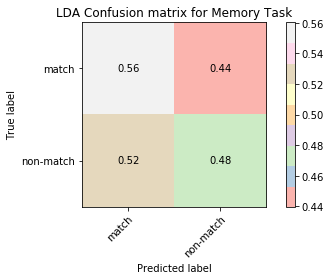

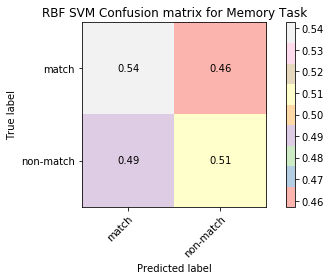

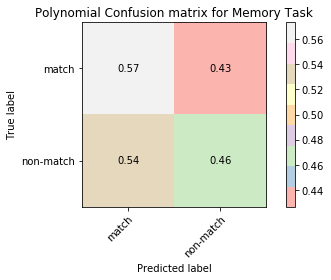

In [6]:
#plotting confusion matrix for the memory task

plot_confusion_matrix(LDA_M_actual, LDA_M_predicted, classes=np.array(["match", "non-match"]), 
                      normalize=True, title='LDA Confusion matrix for Memory Task')

plt.savefig("../Images_and_Graphs/conf_LDA_m.eps")
plt.show()

plot_confusion_matrix(RBF_M_actual, RBF_M_predicted, classes=np.array(["match", "non-match"]), 
                      normalize=True, title='RBF SVM Confusion matrix for Memory Task')

plt.savefig("../Images_and_Graphs/conf_RBF_m.eps")
plt.show()

plot_confusion_matrix(Poly_M_actual, Poly_M_predicted, classes=np.array(["match", "non-match"]), 
                      normalize=True, title='Polynomial Confusion matrix for Memory Task')

plt.savefig("../Images_and_Graphs/conf_Poly_m.eps")
plt.show()






## Perception Task

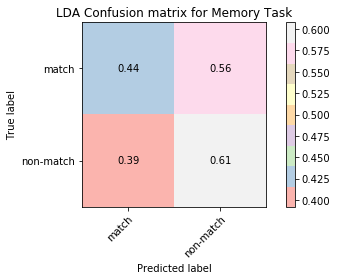

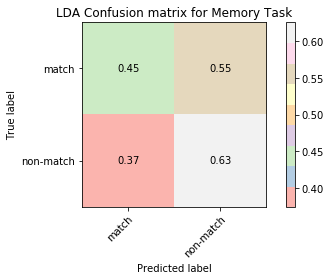

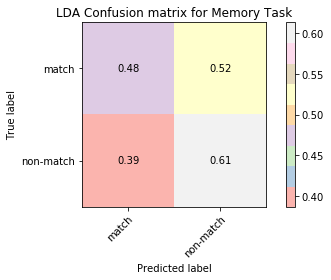

In [7]:
#plotting confusion matrix for the perception task

plot_confusion_matrix(LDA_P_actual, LDA_P_predicted, classes=np.array(["match", "non-match"]), 
                      normalize=True, title='LDA Confusion matrix for Memory Task')

plt.savefig("../Images_and_Graphs/conf_LDA_p.eps")
plt.show()

plot_confusion_matrix(RBF_P_actual, RBF_P_predicted, classes=np.array(["match", "non-match"]), 
                      normalize=True, title='LDA Confusion matrix for Memory Task')

plt.savefig("../Images_and_Graphs/conf_RBF_p.eps")
plt.show()

plot_confusion_matrix(Poly_P_actual, Poly_P_predicted, classes=np.array(["match", "non-match"]), 
                      normalize=True, title='LDA Confusion matrix for Memory Task')

plt.savefig("../Images_and_Graphs/conf_Poly_p.eps")
plt.show()






# ROC Curve

## Memory Task

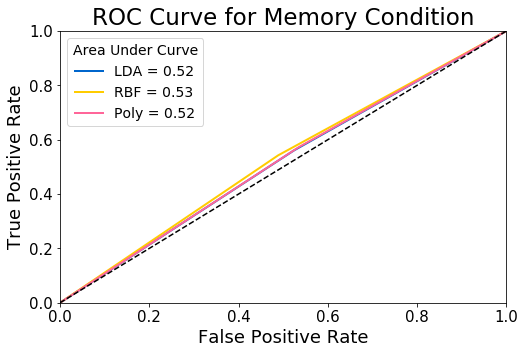

In [8]:
'''calculate the false postice rate and true positive rate for all 
thresholds of the classification and plot the ROC for memory task''' 

fprLDA, tprLDA, thresholdLDA = metrics.roc_curve(pred_LDA_M['label_m'], pred_LDA_M['predicted_m'])
fprRBF, tprRBF, thresholdRBF = metrics.roc_curve(pred_RBF_M['label_m'], pred_RBF_M['predicted_m'])
fprPoly, tprPoly, thresholdPoly = metrics.roc_curve(pred_Poly_M['label_m'], pred_Poly_M['predicted_m'])
roc_aucLDA = metrics.auc(fprLDA, tprLDA)
roc_aucRBF = metrics.auc(fprRBF, tprRBF)
roc_aucPoly = metrics.auc(fprPoly, tprPoly)


plt.figure(figsize=(8, 5))
plt.title('ROC Curve for Memory Condition', fontsize=23)
plt.plot(fprLDA, tprLDA, 'b', label = 'LDA = %0.2f' % roc_aucLDA, color = (0, 0.4, 0.8), linewidth=2)
plt.plot(fprRBF, tprRBF, 'b', label = 'RBF = %0.2f' % roc_aucRBF, color = (1, 0.8, 0), linewidth = 2)
plt.plot(fprPoly, tprPoly, 'b', label = 'Poly = %0.2f' % roc_aucPoly, color = (1, 0.4, 0.6), linewidth = 2)
legend = plt.legend(title="Area Under Curve", loc = 'upper left', fontsize=14)
legend.get_title().set_fontsize('14')
plt.plot([0, 1], [0, 1],'--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("../Images_and_Graphs/ROC_M.png")
plt.show()


## Perception Task

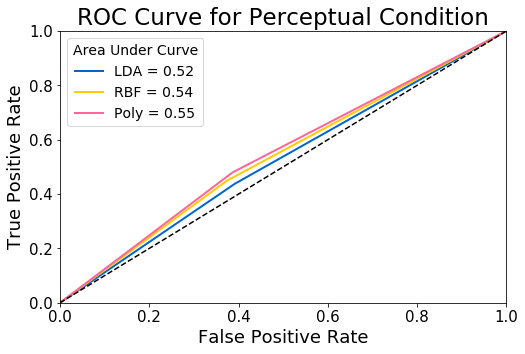

In [9]:
'''calculate the false postice rate and true positive rate for all 
thresholds of the classification and plot the ROC for perception task''' 

fprLDA, tprLDA, thresholdLDA = metrics.roc_curve(pred_LDA_P['label_p'], pred_LDA_P['predicted_p'])
fprRBF, tprRBF, thresholdRBF = metrics.roc_curve(pred_RBF_P['label_p'], pred_RBF_P['predicted_p'])
fprPoly, tprPoly, thresholdPoly = metrics.roc_curve(pred_Poly_P['label_p'], pred_Poly_P['predicted_p'])
roc_aucLDA = metrics.auc(fprLDA, tprLDA)
roc_aucRBF = metrics.auc(fprRBF, tprRBF)
roc_aucPoly = metrics.auc(fprPoly, tprPoly)


plt.figure(figsize=(8, 5))
plt.title('ROC Curve for Perceptual Condition', fontsize=23)
plt.plot(fprLDA, tprLDA, 'b', label = 'LDA = %0.2f' % roc_aucLDA, color = (0, 0.4, 0.8), linewidth=2)
plt.plot(fprRBF, tprRBF, 'b', label = 'RBF = %0.2f' % roc_aucRBF, color = (1, 0.8, 0), linewidth=2)
plt.plot(fprPoly, tprPoly, 'b', label = 'Poly = %0.2f' % roc_aucPoly, color = (1, 0.4, 0.6), linewidth=2)
legend = plt.legend(title="Area Under Curve", loc = 'upper left', fontsize=14)
legend.get_title().set_fontsize('14')
plt.plot([0, 1], [0, 1],'--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("../Images_and_Graphs/ROC_P.png")
plt.show()


# Accuracy, Precision, Recall and F1-Score

## Memory Task

In [10]:
#evaluating the accuracy, precision, recall and f1-scores for the memory task

LDA_M_rec = recall_score(pred_LDA_M['label_m'], pred_LDA_M['predicted_m'], average='macro') 
LDA_M_prec = precision_score(pred_LDA_M['label_m'], pred_LDA_M['predicted_m'], average='macro')
LDA_M_acc = accuracy_score(pred_LDA_M['label_m'], pred_LDA_M['predicted_m'])
LDA_M_f1 = f1_score(pred_LDA_M['label_m'], pred_LDA_M['predicted_m'], average='macro')

RBF_M_rec = recall_score(pred_RBF_M['label_m'], pred_RBF_M['predicted_m'], average='macro') 
RBF_M_prec = precision_score(pred_RBF_M['label_m'], pred_RBF_M['predicted_m'], average='macro')
RBF_M_acc = accuracy_score(pred_RBF_M['label_m'], pred_RBF_M['predicted_m'])
RBF_M_f1 = f1_score(pred_RBF_M['label_m'], pred_RBF_M['predicted_m'], average='macro')


Poly_M_rec = recall_score(pred_Poly_M['label_m'], pred_Poly_M['predicted_m'], average='macro') 
Poly_M_prec = precision_score(pred_Poly_M['label_m'], pred_Poly_M['predicted_m'], average='macro')
Poly_M_acc = accuracy_score(pred_Poly_M['label_m'], pred_Poly_M['predicted_m'])
Poly_M_f1 = f1_score(pred_Poly_M['label_m'], pred_Poly_M['predicted_m'], average='macro')


print("Memory \n")
print("LDA Acc:", LDA_M_acc, "Prec:", LDA_M_prec, "Rec:", LDA_M_rec, "F1: ", LDA_M_f1)
print("\n")
print("RBF Acc:", RBF_M_acc, "Prec:", RBF_M_prec, "Rec:", RBF_M_rec, "F1: ", RBF_M_f1)
print("\n")
print("Poly Acc:", Poly_M_acc, "Prec:", Poly_M_prec, "Rec:", Poly_M_rec, "F1: ", Poly_M_f1)

Memory 

LDA Acc: 0.5193395639920424 Prec: 0.5183013707039574 Rec: 0.5181826726080045 F1:  0.5178112457772523


RBF Acc: 0.5273023043766578 Prec: 0.5268753700420842 Rec: 0.5268661344898935 F1:  0.5268665319146424


Poly Acc: 0.5203757045755968 Prec: 0.5190962794062584 Rec: 0.5188808751065943 F1:  0.5181080934396382


## Perception Task

In [11]:
#evaluating the accuracy, precision, recall and f1-scores for the perception task

LDA_P_rec = recall_score(pred_LDA_P['label_p'], pred_LDA_P['predicted_p'], average='macro') 
LDA_P_prec = precision_score(pred_LDA_P['label_p'], pred_LDA_P['predicted_p'], average='macro')
LDA_P_acc = accuracy_score(pred_LDA_P['label_p'], pred_LDA_P['predicted_p'])
LDA_P_f1 = f1_score(pred_LDA_P['label_p'], pred_LDA_P['predicted_p'], average='macro')

RBF_P_rec = recall_score(pred_RBF_P['label_p'], pred_RBF_P['predicted_p'], average='macro') 
RBF_P_prec = precision_score(pred_RBF_P['label_p'], pred_RBF_P['predicted_p'], average='macro')
RBF_P_acc = accuracy_score(pred_RBF_P['label_p'], pred_RBF_P['predicted_p'])
RBF_P_f1 = f1_score(pred_RBF_P['label_p'], pred_RBF_P['predicted_p'], average='macro')

Poly_P_rec = recall_score(pred_Poly_P['label_p'], pred_Poly_P['predicted_p'], average='macro') 
Poly_P_prec = precision_score(pred_Poly_P['label_p'], pred_Poly_P['predicted_p'], average='macro')
Poly_P_acc = accuracy_score(pred_Poly_P['label_p'], pred_Poly_P['predicted_p'])
Poly_P_f1 = f1_score(pred_Poly_P['label_p'], pred_Poly_P['predicted_p'], average='macro')

print("Perception \n")
print("LDA Acc:", LDA_P_acc, "Prec:", LDA_P_prec, "Rec:", LDA_P_rec, "F1: ", LDA_P_f1)
print("\n")
print("RBF Acc:", RBF_P_acc, "Prec:", RBF_P_prec, "Rec:", RBF_P_rec, "F1: ", RBF_P_f1)
print("\n")
print("Poly Acc:", Poly_P_acc, "Prec:", Poly_P_prec, "Rec:", Poly_P_rec, "F1: ", Poly_P_f1)


Perception 

LDA Acc: 0.5298357622021744 Prec: 0.5236735344070096 Rec: 0.5231085108353598 F1:  0.5222152624808033


RBF Acc: 0.5445940319222762 Prec: 0.5386631788053091 Rec: 0.5376241236185212 F1:  0.5367037430843238


Poly Acc: 0.5518112421929215 Prec: 0.547163908660195 Rec: 0.5465234961778459 F1:  0.546321034043355
